# Report Analysis

This notebook includes different metrics to analyze an execution performance extracting data from its report.

Imports:

In [3]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

#### Report to analyze
Change this cell to match the report's name that is going to be analysed. It should exist under the `/reports` folder.

In [4]:
report_name = "report_2024_01_03T16_28_06.json" 

with open('../reports/'+report_name, 'r') as file:
    data = json.load(file)

Basic information:

In [5]:
start_time = data["start_time"]
end_time = data["end_time"]
print(f"GA execution - {start_time.split('T')[0]} at {start_time.split('T')[1]}")
print(f"Population size: {len(data['initial_population'])}")
print(f"Mutation rate: {data['mutation_rate']}")
print(f"Selection rate: {data['selection_rate']}")
print(f"Genes limits:")
genes_names = []
for key,value in data["genes_limits"].items():
    genes_names.append(key)
    print(f"\t{key} - {value}")
print("-------------------------------------")
print("Genetic Operators used:")
print(f"\tCrossover: {data['operators']['crossover']}")
print(f"\tFitness: {data['operators']['fitness']}")
print(f"\tMutation: {data['operators']['mutation']}")
print(f"\tSelection: {data['operators']['selection']}")
print(f"\tTermination: {data['operators']['termination']}")
print("-------------------------------------")
print("Results:")
print(f"\tBest individual:")
i = 0
for gene in data["results"]["best_individual"]:
    print(f"\t\t{genes_names[i]} = {gene}")
    i += 1

print(f"\tFitness: {data['results']['fitness']}")
print(f"\tTotal iterations - {len(data['algorithm_execution'])}")
start = datetime.strptime(start_time, "%Y:%m:%dT%H:%M:%S")
end = datetime.strptime(end_time, "%Y:%m:%dT%H:%M:%S")
diff = end - start
print(f"\tTotal time - {(diff.seconds / 3600):.2f} hours")



GA execution - 2024:01:03 at 16:28:06
Population size: 50
Mutation rate: 0.05
Selection rate: 0.5
Genes limits:
	a - [-10, 10]
	b - [-10, 10]
	c - [-2, 2]
	w - [-6, 6]
-------------------------------------
Genetic Operators used:
	Crossover: Blending Crossover
	Fitness: FitnessDistance
	Mutation: Remake Gene Mutation
	Selection: Elitist Selection
	Termination: LowerThan0.5Simulation
-------------------------------------
Results:
	Best individual:
		a = 0.343038846947356
		b = 7.59395293302817
		c = -0.017140772827689475
		w = 5.928119785928505
	Fitness: 0.16334274421044237
	Total iterations - 47
	Total time - 6.24 hours


Dataframe generation

In [6]:
best_individuals = []
average_individuals = []

for iter,value in data['algorithm_execution'].items():
    best = min(value['fitness'])
    pos = value['fitness'].index(best)
    best_individuals.append({
        'iteration': iter,
        'a': value['population'][pos][0],
        'b': value['population'][pos][1],
        'c': value['population'][pos][2],
        'w': value['population'][pos][3],
        'fitness': best
    })

    average_individuals.append({
        'iteration': iter,
        'fitness': np.mean(value['fitness'])
    })

best_individuals = pd.DataFrame(best_individuals)
print(best_individuals.head())
print("---------------------------------")
average_individuals = pd.DataFrame(average_individuals)
print(average_individuals.head())



  iteration         a         b         c         w   fitness
0         1 -0.007173  4.041392 -0.477645  5.301759  2.957671
1         2 -3.905115  8.137463 -0.084589  4.498686  2.884371
2         3 -3.905115  8.137463 -0.084589 -2.991479  2.217289
3         4 -3.905115  8.137463  0.375119  5.928120  2.294747
4         5 -9.769507  6.569126  1.516443  5.928120  1.124835
---------------------------------
  iteration    fitness
0         1  11.196225
1         2   9.708087
2         3   8.017575
3         4   7.188006
4         5   6.623025


Best gene values vs fitness

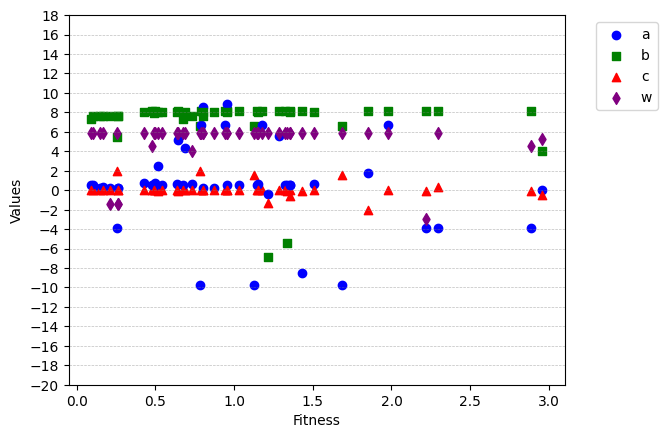

In [7]:
fig, ax = plt.subplots()
for i, row in best_individuals.iterrows():
    ax.scatter(row['fitness'], row['a'], color='blue', marker='o', label='a' if i == 0 else '')
    ax.scatter(row['fitness'], row['b'], color='green', marker='s', label='b' if i == 0 else '')
    ax.scatter(row['fitness'], row['c'], color='red', marker='^', label='c' if i == 0 else '')
    ax.scatter(row['fitness'], row['w'], color='purple', marker='d', label='w' if i == 0 else '')

ax.set_xlabel('Fitness')
ax.set_ylabel('Values')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 

y_ticks = np.arange(-20, 20, 2)
ax.set_yticks(y_ticks, minor=False)
ax.yaxis.grid(which='major', linestyle='--', linewidth='0.5', color='gray', alpha=0.5)


plt.show()

Best and average fitness per iteration

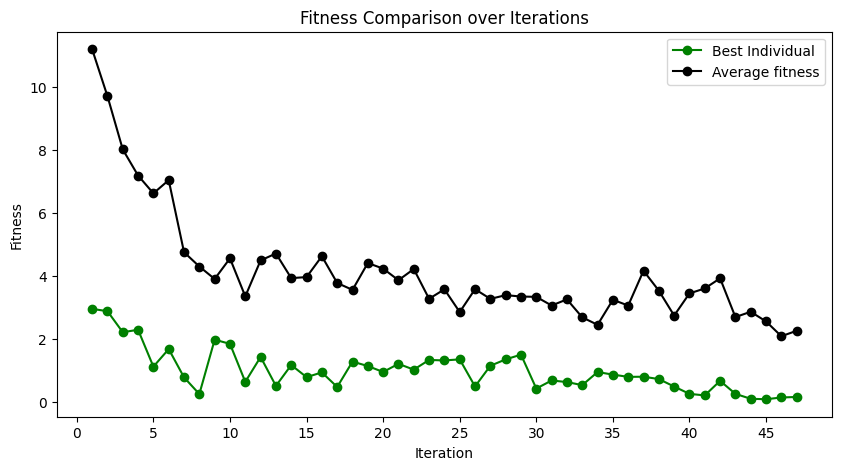

In [11]:
best_individuals['iteration'] = pd.to_numeric(best_individuals['iteration'])
average_individuals['iteration'] = pd.to_numeric(average_individuals['iteration'])

fig, ax = plt.subplots(figsize=(10, 5))

plt.plot(best_individuals['iteration'], best_individuals['fitness'], marker='o', linestyle='-', color='g', label='Best Individual')
plt.plot(average_individuals['iteration'], average_individuals['fitness'], marker='o', linestyle='-', color='black', label='Average fitness')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('Fitness Comparison over Iterations')
plt.xticks(best_individuals['iteration'][::5]-1, fontsize=10)
plt.legend()
plt.show()